<a href="https://colab.research.google.com/github/agnislur/air_quality_in_yogyakarta/blob/main/TUBES_CEUNAH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
delw

# IMPORT DATASET


In [ ]:
#install kaggel
!pip install -q kaggle

In [ ]:

#upload api key
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aelzii","key":"289e4f7c92e2105c7ae14fa13ab2b543"}'}

In [ ]:
|#create kaggle folder
! mkdir ~/.kaggle

SyntaxError: ignored

In [ ]:
#copy the kaggle.json to folder created
! cp kaggle.json ~/.kaggle/

cp: cannot create regular file '/root/.kaggle/': Not a directory


In [ ]:
#Permission for the json to act
! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
! kaggle dataset list

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
! kaggle datasets download -d adhang/air-quality-in-yogyakarta-indonesia-2020

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
! unzip air-quality-in-yogyakarta-indonesia-2020.zip

unzip:  cannot find or open air-quality-in-yogyakarta-indonesia-2020.zip, air-quality-in-yogyakarta-indonesia-2020.zip.zip or air-quality-in-yogyakarta-indonesia-2020.zip.ZIP.


In [ ]:
ls

kaggle.json  sample_data/


# **Data Upload**

In [ ]:
from google.colab import files

uploaded = files.upload()


Saving pollutant-standards-index-jogja-2020.csv to pollutant-standards-index-jogja-2020.csv


# **Data Cleaning**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [ ]:
df=pd.read_csv("pollutant-standards-index-jogja-2020.csv")
df

,Date,PM10,SO2,CO,O3,NO2,Max,Critical Component,Category
0,1/1/2020,30,2,69,19,0,69,CO,Moderate
1,1/2/2020,16,2,58,33,0,58,CO,Moderate
2,1/3/2020,12,2,46,18,0,46,CO,Good
3,1/4/2020,8,2,84,29,0,84,CO,Moderate
4,1/5/2020,8,3,50,0,0,50,CO,Good
...,...,...,...,...,...,...,...,...,...
361,12/27/2020,12,1,24,0,0,24,CO,Good
362,12/28/2020,9,0,16,2,0,16,CO,Good
363,12/29/2020,9,0,15,20,0,20,O3,Good
364,12/30/2020,6,0,17,10,0,17,CO,Good


Data
- Date - Date of measurements
- PM10 - Particulate Matter measurements
- S02 - Sulfur Dioxide measurements
- C0 - Carbon Monoxide measurements
- 03 - Ozone measurements
- NO2 - Natrium Dioxide measurements
- Max - The Highest measurements value
- Critical Component - Component(s) taht has the highest measurement value
- Category - Category of air pollution, whether it's good or not

In [ ]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Date                366 non-null    object
 1   PM10                366 non-null    int64 
 2   SO2                 366 non-null    int64 
 3   CO                  366 non-null    int64 
 4   O3                  366 non-null    int64 
 5   NO2                 366 non-null    int64 
 6   Max                 366 non-null    int64 
 7   Critical Component  366 non-null    object
 8   Category            366 non-null    object
dtypes: int64(6), object(3)
memory usage: 25.9+ KB


In [ ]:
df.shape

(366, 9)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

Date                  0
PM10                  0
SO2                   0
CO                    0
O3                    0
NO2                   0
Max                   0
Critical Component    0
Category              0
dtype: int64

In [ ]:
df['Category'].unique()

array(['Moderate', 'Good', 'Unhealthy'], dtype=object)

In [ ]:
df['Critical Component'].unique()

array(['CO', 'O3', 'PM10', 'PM10, CO', 'PM10,CO', 'CO, PM10', 'PM10,O3'],
      dtype=object)

<Axes: >

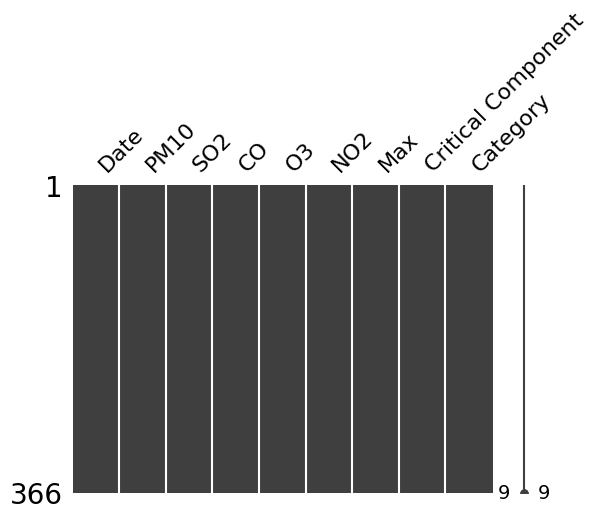

In [ ]:
import missingno as msno
msno.matrix(df,figsize=(6,4))

In [ ]:

max_PM10 = df["PM10"].max()
min_PM10 = df["PM10"].min()
max_SO2 = df["SO2"].max()
min_SO2 = df["SO2"].min()
max_CO = df["CO"].max()
min_CO = df["CO"].min()
max_O3 = df["O3"].max()
min_O3 = df["O3"].min()
max_NO2 = df["NO2"].max()
min_NO2 = df["NO2"].min()
max_max = df["Max"].max()
min_max = df["Max"].min()

print("Maksimal untuk bagian PM10:",max_PM10)
print("Minimal untuk bagian PM10:",min_PM10)
print("Maksimal untuk bagian SO2:",max_SO2)
print("Minimal untuk bagian SO2:",min_SO2)
print("Maksimal untuk bagian CO:",max_CO)
print("Minimal untuk bagian CO:",min_CO)
print("Maksimal untuk bagian O3:",max_O3)
print("Minimal untuk bagian O3:",min_O3)

print("Maksimal untuk bagian NO2:",max_NO2)
print("Minimal untuk bagian NO2:",min_NO2)
print("Maksimal untuk bagian Max:",max_max)
print("Minimal untuk bagian Max:",min_max)

Maksimal untuk bagian PM10: 60
Minimal untuk bagian PM10: 3
Maksimal untuk bagian SO2: 6
Minimal untuk bagian SO2: 0
Maksimal untuk bagian CO: 164
Minimal untuk bagian CO: 0
Maksimal untuk bagian O3: 81
Minimal untuk bagian O3: 0
Maksimal untuk bagian NO2: 0
Minimal untuk bagian NO2: 0
Maksimal untuk bagian Max: 164
Minimal untuk bagian Max: 11


In [ ]:
df.describe()
#sebenernya lebih efisien pakai ini si ketimbang atasnya

,PM10,SO2,CO,O3,NO2,Max
count,366.000000,366.000000,366.000000,366.000000,366.0,366.000000
mean,19.699454,1.021858,31.161202,16.054645,0.0,35.800546
std,9.023704,1.012017,22.263521,14.172026,0.0,21.397890
min,3.000000,0.000000,0.000000,0.000000,0.0,11.000000
25%,14.000000,0.000000,18.000000,7.000000,0.0,21.000000
50%,18.500000,1.000000,23.500000,14.000000,0.0,28.000000
75%,23.000000,2.000000,40.000000,22.000000,0.0,45.000000
max,60.000000,6.000000,164.000000,81.000000,0.0,164.000000


In [ ]:
len(df.columns)

9

In [ ]:
df.head()

,Date,PM10,SO2,CO,O3,NO2,Max,Critical Component,Category
0,1/1/2020,30,2,69,19,0,69,CO,Moderate
1,1/2/2020,16,2,58,33,0,58,CO,Moderate
2,1/3/2020,12,2,46,18,0,46,CO,Good
3,1/4/2020,8,2,84,29,0,84,CO,Moderate
4,1/5/2020,8,3,50,0,0,50,CO,Good


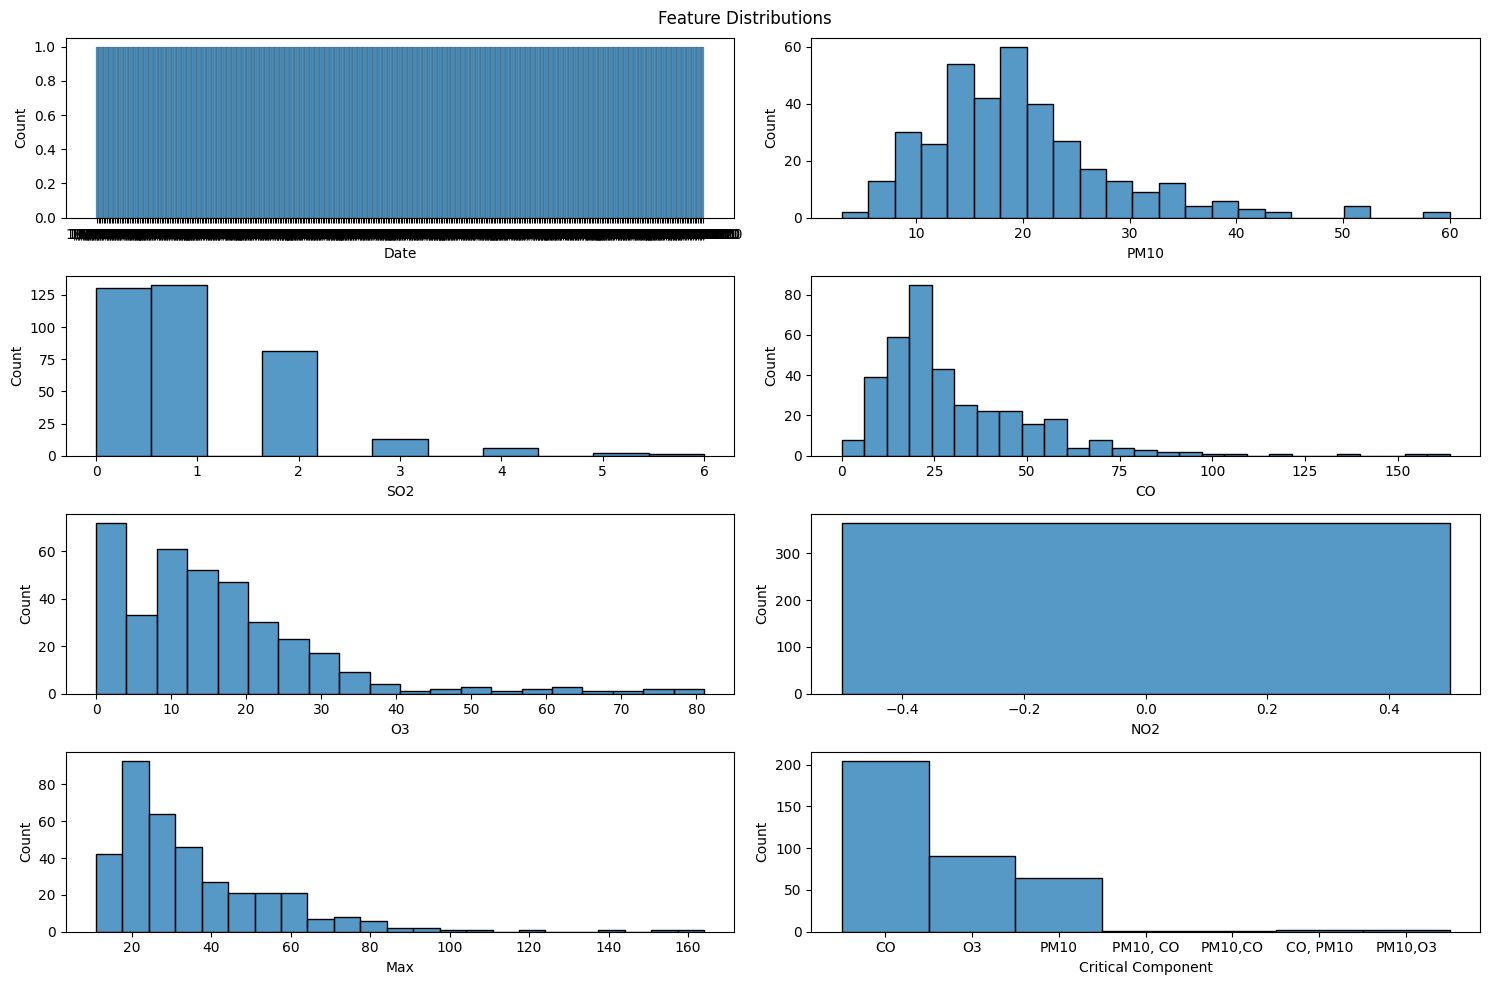

In [ ]:
n_rows = 4
n_cols = 2
fig, axs = plt.subplots(n_rows, n_cols, figsize=(15,10))

for i in range(n_rows):
  for j in range(n_cols):
    feature = df.columns[i*n_cols+j]
    sns.histplot(x=df[feature], ax=axs[i][j])

fig.suptitle("Feature Distributions")
fig.tight_layout()
fig.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


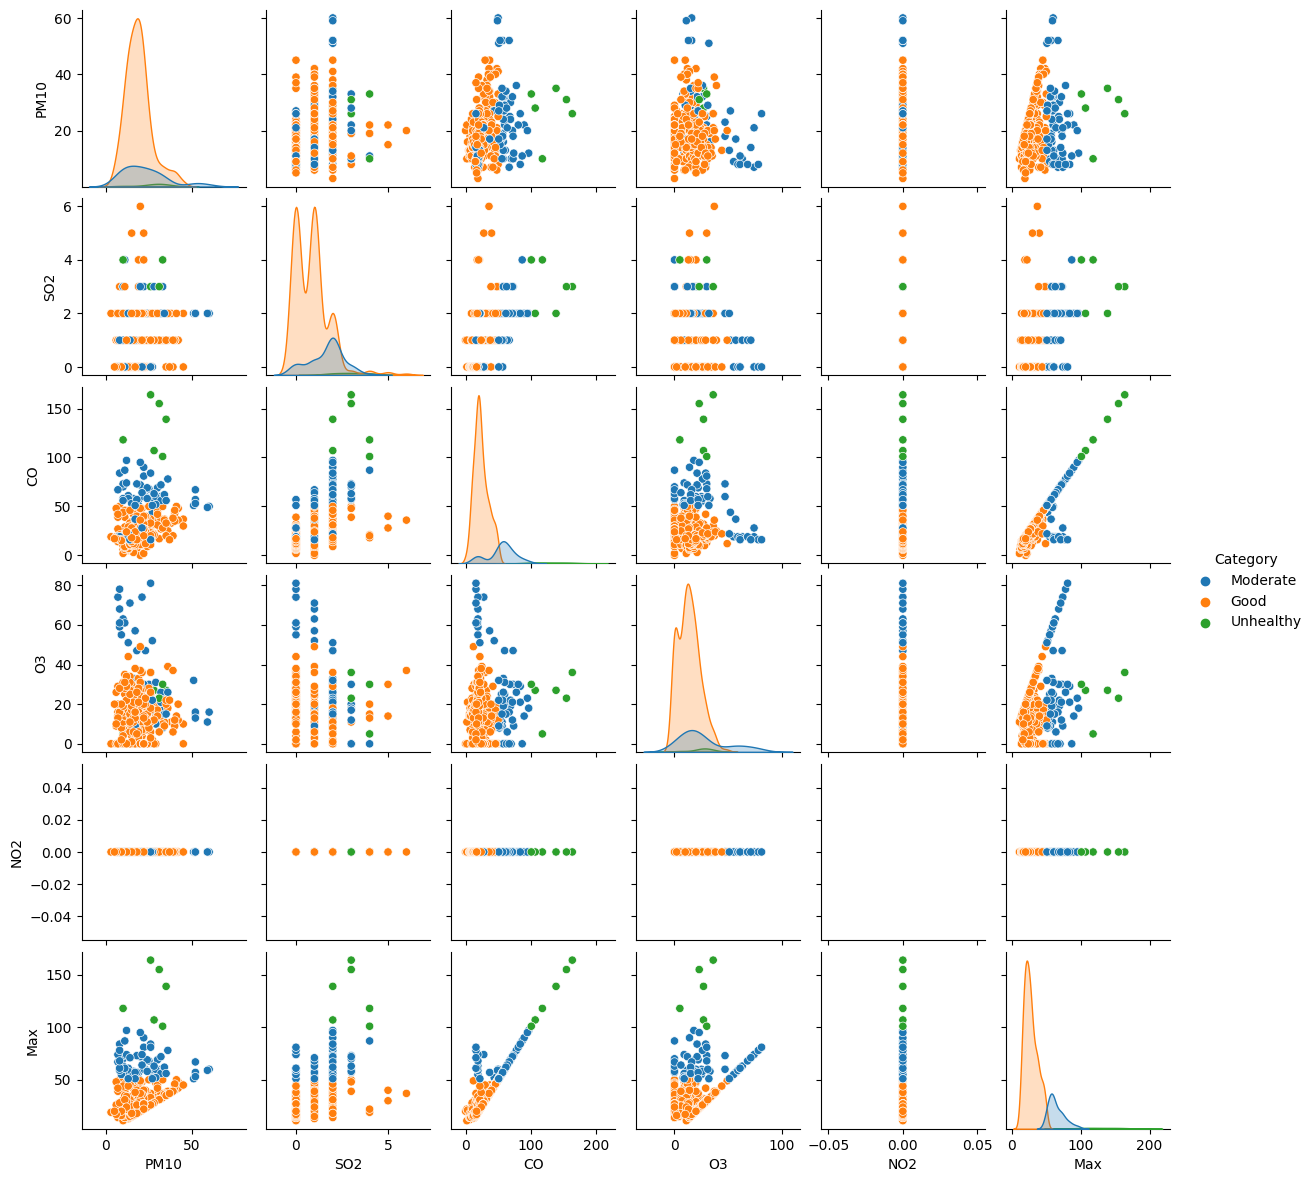

In [ ]:
sns.pairplot(df, hue="Category", size=2)
plt.show()

**Effect of PM10 On Category**

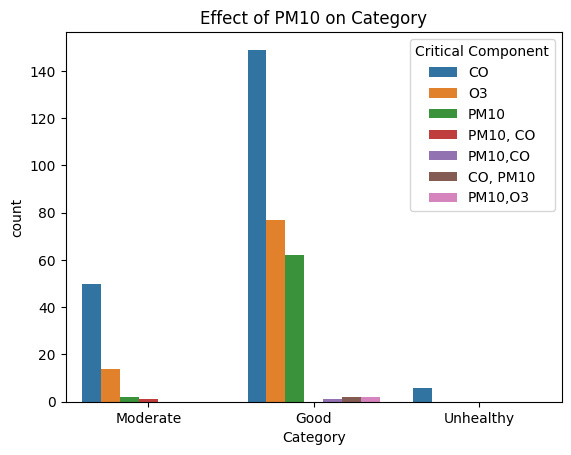

In [ ]:
sns.countplot(data=df, x="Category", hue="Critical Component")
plt.title("Effect of Critical Component on Category")
plt.show()

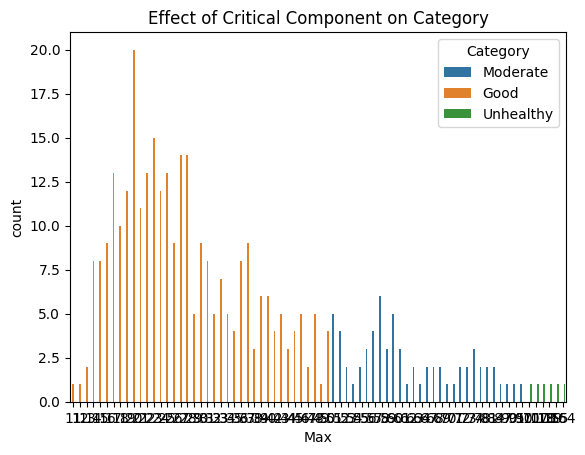

In [ ]:
sns.countplot(data=df, x="Max", hue="Category")
plt.title("Effect of Critical Component on Category")
plt.show()

**Correlations**

In [ ]:
df.head()

,Date,PM10,SO2,CO,O3,NO2,Max,Critical Component,Category
0,1/1/2020,30,2,69,19,0,69,CO,Moderate
1,1/2/2020,16,2,58,33,0,58,CO,Moderate
2,1/3/2020,12,2,46,18,0,46,CO,Good
3,1/4/2020,8,2,84,29,0,84,CO,Moderate
4,1/5/2020,8,3,50,0,0,50,CO,Good


In [ ]:
import sklearn
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder


In [ ]:
processed_data = df.copy()
processed_data["Critical Component"] = LabelEncoder().fit_transform(processed_data["Critical Component"])

# map Label to ordinal encoding
label_map = {
    "Moderate": 1,
    "Good": 2,
    "Unhealthy": 3,
}
processed_data = processed_data.replace({"Category": label_map})

processed_data.head()

,Date,PM10,SO2,CO,O3,NO2,Max,Critical Component,Category
0,1/1/2020,30,2,69,19,0,69,0,1
1,1/2/2020,16,2,58,33,0,58,0,1
2,1/3/2020,12,2,46,18,0,46,0,2
3,1/4/2020,8,2,84,29,0,84,0,1
4,1/5/2020,8,3,50,0,0,50,0,2


In [ ]:
processed_data['Critical Component'].unique()

array([0, 2, 3, 4, 5, 1, 6])

<ipython-input-59-3707ac2ff249>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(processed_data.corr(), annot=True)


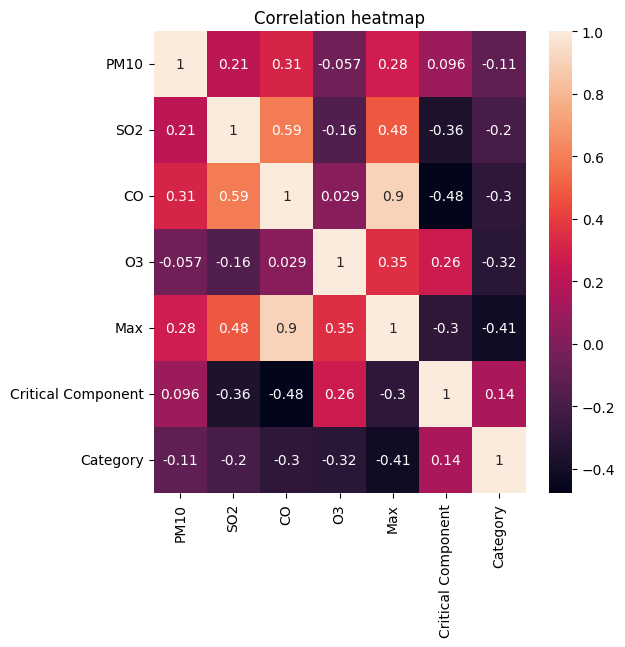

In [ ]:
plt.figure(figsize=(6, 6))
sns.heatmap(processed_data.corr(), annot=True)
plt.title("Correlation heatmap")
plt.show()

In [ ]:
processed_data['NO2'].unique()

array([0])

In [ ]:
processed_data = processed_data.drop(columns=["NO2"])
processed_data.head()

,Date,PM10,SO2,CO,O3,Max,Critical Component,Category
0,1/1/2020,30,2,69,19,69,0,1
1,1/2/2020,16,2,58,33,58,0,1
2,1/3/2020,12,2,46,18,46,0,2
3,1/4/2020,8,2,84,29,84,0,1
4,1/5/2020,8,3,50,0,50,0,2


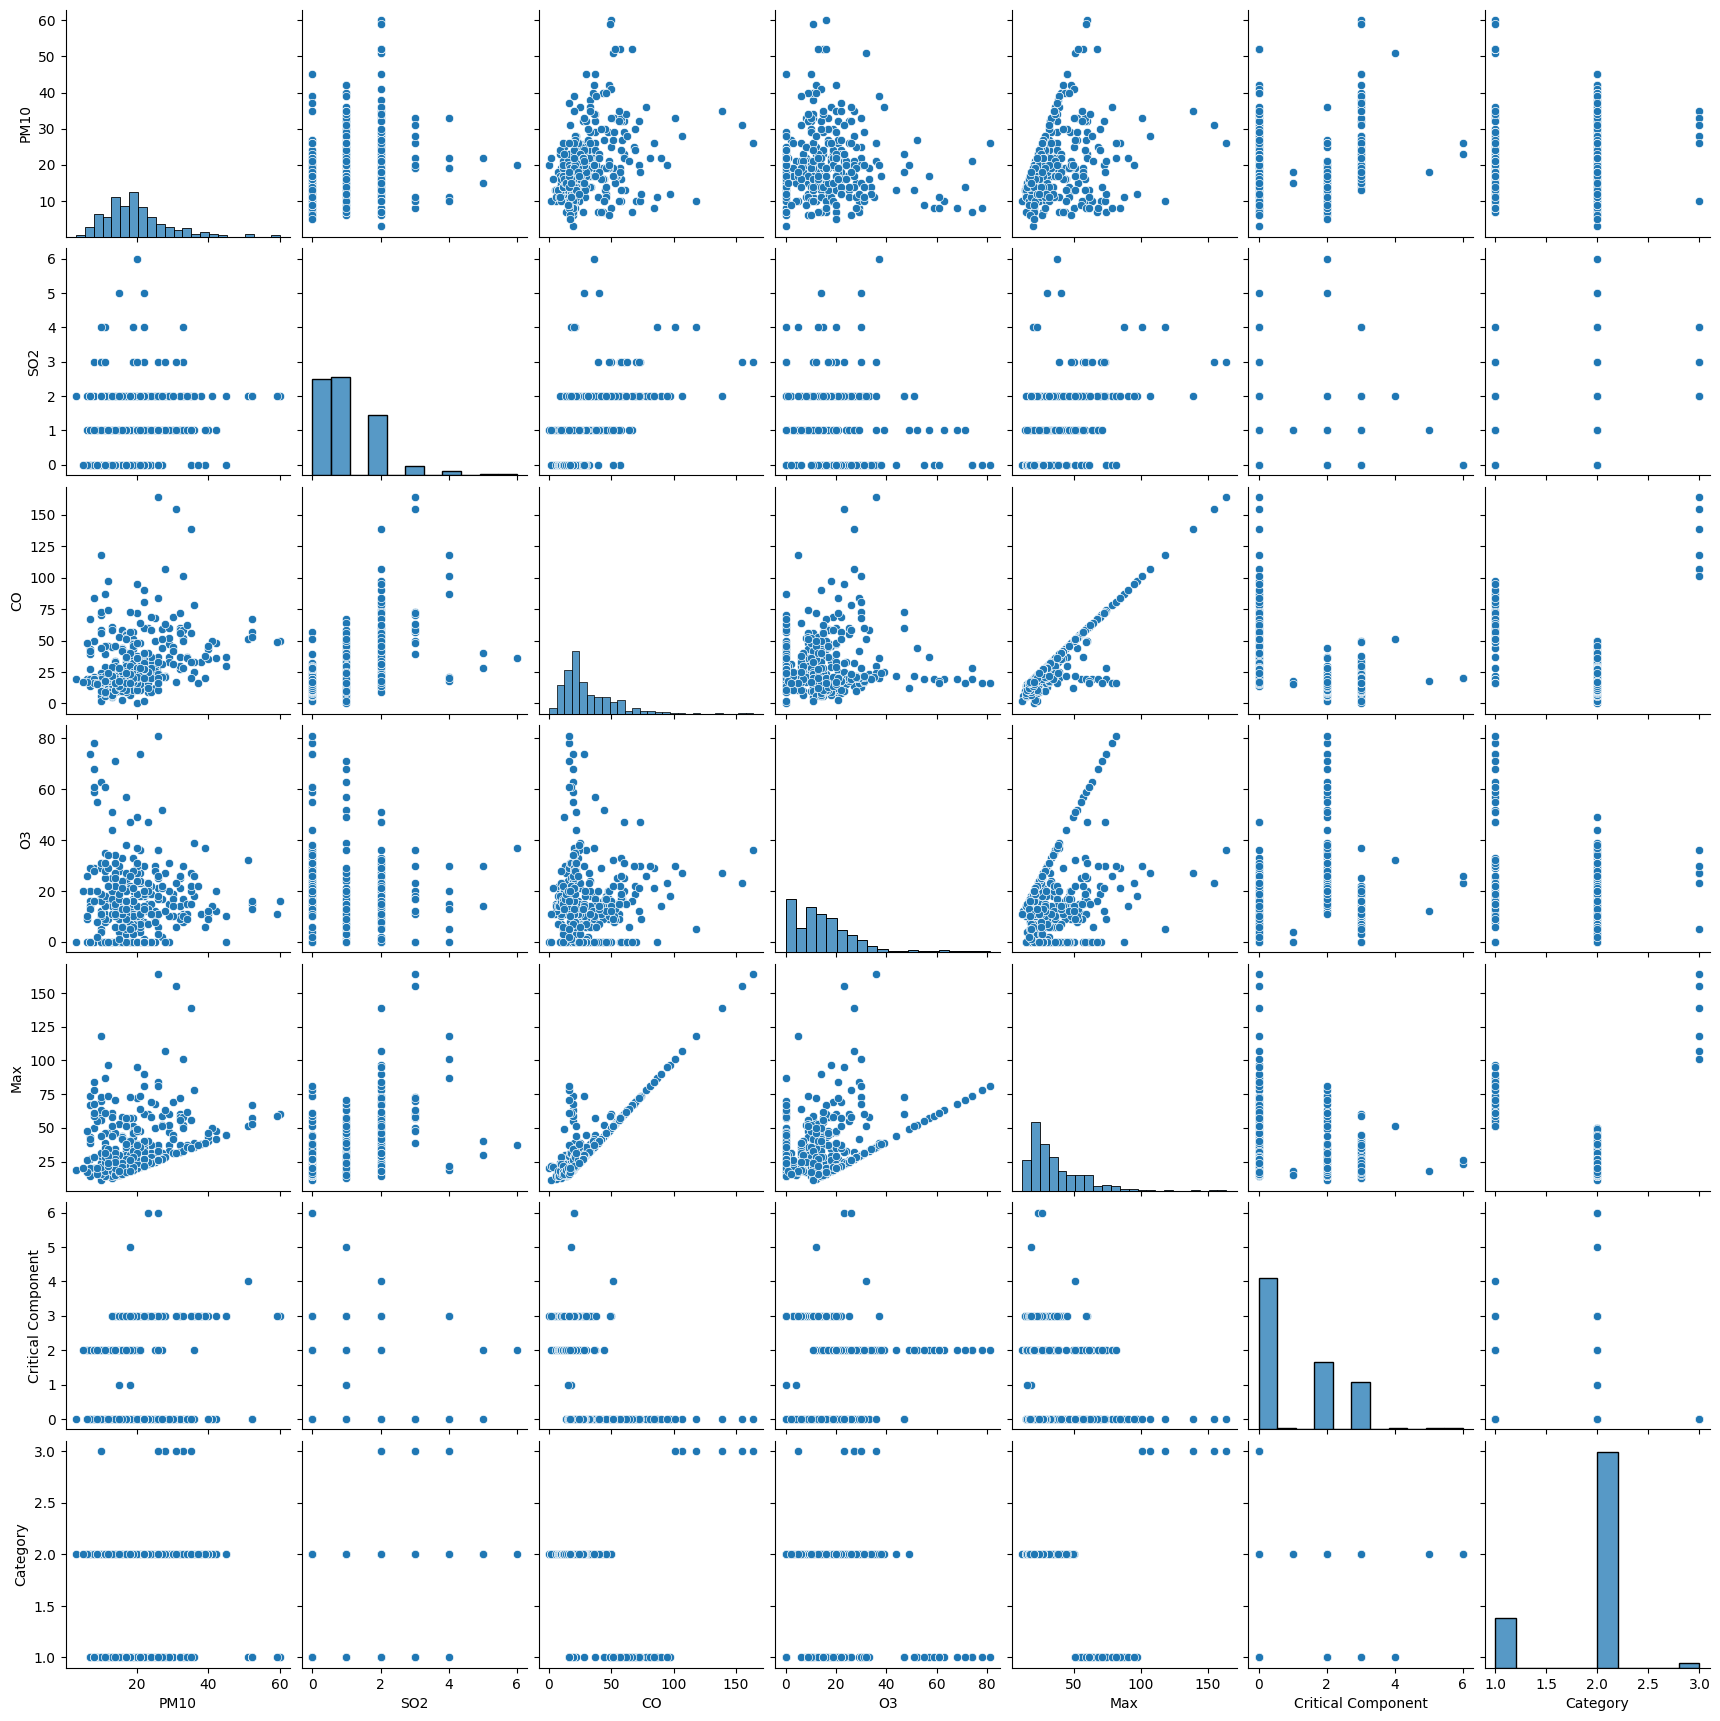

In [ ]:
sns.pairplot(processed_data)
plt.show()

<ipython-input-56-bfaf7aca18c5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  target_corr = processed_data.corr()["Category"]


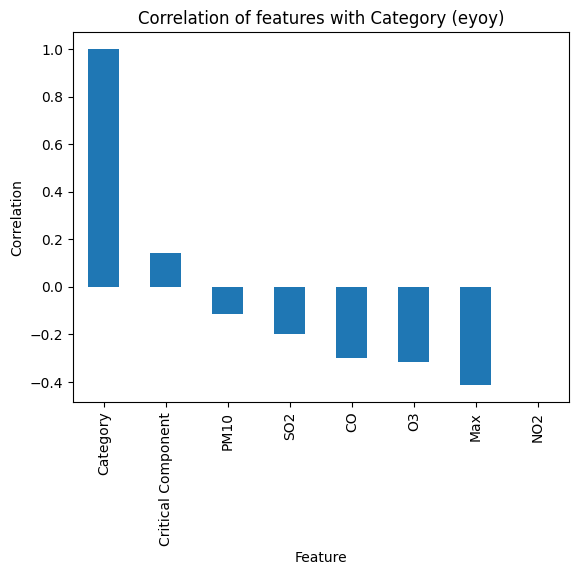

In [ ]:
target_corr = processed_data.corr()["Category"]
target_corr = target_corr.sort_values(ascending=False)
target_corr.plot(kind="bar")
plt.xlabel("Feature")
plt.ylabel("Correlation")
plt.title("Correlation of features with Category (eyoy)")
plt.show()

**Feature Engineering**

In [ ]:
X = processed_data[["Max", "O3", "CO", "SO2", "PM10", "Critical Component"]]
y = processed_data["Category"]

print(X.shape)
print(y.shape)

(366, 6)
(366,)


In [ ]:
from sklearn.preprocessing import PolynomialFeatures


In [ ]:
poly = PolynomialFeatures(2)
poly.fit(X)
poly_feats = pd.DataFrame(data=poly.transform(X), columns=poly.get_feature_names_out())
poly_feats = poly_feats.iloc[:, 1:]
print(poly_feats.shape)
poly_feats.head()

(366, 27)


,Max,O3,CO,SO2,PM10,Critical Component,Max^2,Max O3,Max CO,Max SO2,...,CO^2,CO SO2,CO PM10,CO Critical Component,SO2^2,SO2 PM10,SO2 Critical Component,PM10^2,PM10 Critical Component,Critical Component^2
0,69.0,19.0,69.0,2.0,30.0,0.0,4761.0,1311.0,4761.0,138.0,...,4761.0,138.0,2070.0,0.0,4.0,60.0,0.0,900.0,0.0,0.0
1,58.0,33.0,58.0,2.0,16.0,0.0,3364.0,1914.0,3364.0,116.0,...,3364.0,116.0,928.0,0.0,4.0,32.0,0.0,256.0,0.0,0.0
2,46.0,18.0,46.0,2.0,12.0,0.0,2116.0,828.0,2116.0,92.0,...,2116.0,92.0,552.0,0.0,4.0,24.0,0.0,144.0,0.0,0.0
3,84.0,29.0,84.0,2.0,8.0,0.0,7056.0,2436.0,7056.0,168.0,...,7056.0,168.0,672.0,0.0,4.0,16.0,0.0,64.0,0.0,0.0
4,50.0,0.0,50.0,3.0,8.0,0.0,2500.0,0.0,2500.0,150.0,...,2500.0,150.0,400.0,0.0,9.0,24.0,0.0,64.0,0.0,0.0


In [ ]:
poly_feats["Category"] = y

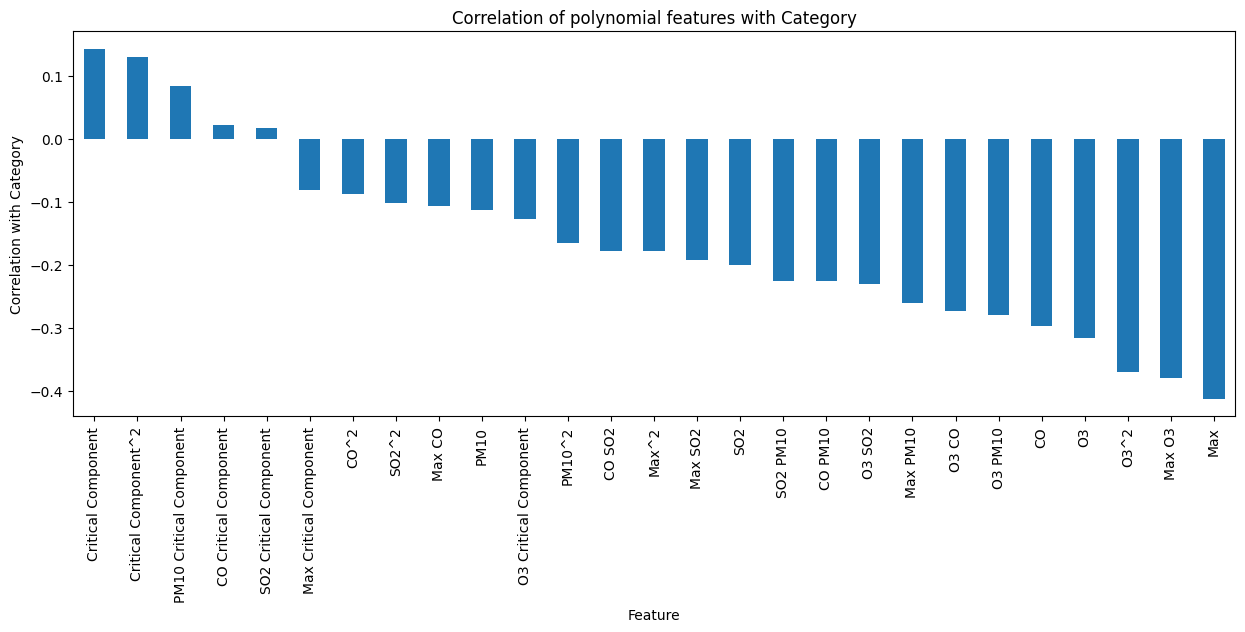

In [ ]:
target_corr = poly_feats.corr()["Category"]
target_corr = target_corr.sort_values(ascending=False)

plt.figure(figsize=(15, 5))
target_corr[1:].plot(kind="bar")
plt.xlabel("Feature")
plt.ylabel("Correlation with Category")
plt.title("Correlation of polynomial features with Category")
plt.show()

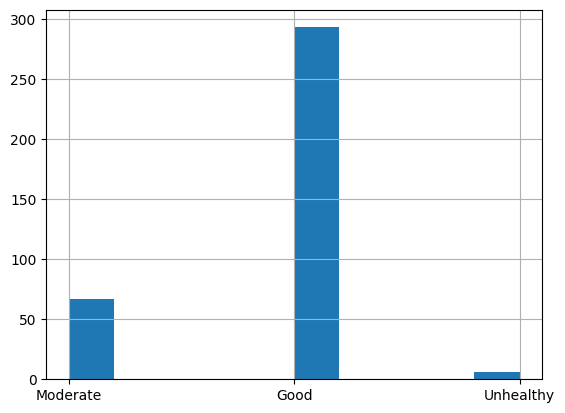

In [ ]:
df["Category"].hist()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegressionCV

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


In [ ]:
pipe = Pipeline(steps=[
    ('scaler', StandardScaler()),
#     ('preprocessor', PolynomialFeatures(degree=2)),
    ('estimator', DecisionTreeClassifier())
])

param_grid = {
    "estimator__criterion": ["gini", "entropy", "log_loss"],
    "estimator__splitter": ["best", "random"],
    "estimator__max_depth": [None, 4, 5],
}
search = GridSearchCV(pipe, param_grid, cv=5)
search.fit(X, y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('estimator',
                                        DecisionTreeClassifier())]),
             param_grid={'estimator__criterion': ['gini', 'entropy',
                                                  'log_loss'],
                         'estimator__max_depth': [None, 4, 5],
                         'estimator__splitter': ['best', 'random']})

In [ ]:
search.best_score_

0.9972602739726029

In [ ]:
search.best_params_


{'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__splitter': 'best'}

In [ ]:
D